# Project Goal: Predict life expectancy for different countries in year 2030.
- This will be a semi supervised, regression task and batch learning 

In [1]:
import pandas as pd 
import numpy as np 
import sklearn.linear_model
import os

https://www.kaggle.com/datasets/hirammndez/life-expectancy-data?resource=download

In [2]:
dataorg = pd.read_csv("Lifeexpectancy.csv")
dataorg.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
datacopy = dataorg.copy()
datacopy.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
#Getting to Know the Columns
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

for the following code I wanted to see how many countries where in the data and how many times. To do this I had to so a value_counts() on just the Country column. This worked to tell me the counts but I did not know how many countries yet. To do this I needed to turn the output into a Dataframe by adding an index. Using the count as index worked but the output was only giving me the first 5 and last 5 rows of the whole list. It was i my interest to see all the countries so adding a column to show the maximum amount or rows gave me that. Doind this showed me that most countries had 16 entries each and a few countries with just 1 entry. 

In [5]:
countriestot = datacopy['Country'].value_counts().reset_index(name='count')
pd.set_option('display.max_rows', None)

countriestot.head()


,index,count
0,Afghanistan,16
1,Peru,16
2,Nicaragua,16
3,Niger,16
4,Nigeria,16


Now the main point of this MLA is to figure out life expectancy per country in 2030 so I also wanted to separate the countries life expectancy and see if there was anything interesting I could find based on ther status, developed or developing. 

In [6]:
country_status1 = datacopy[["Country", "Status", 
                            "Life expectancy"]].value_counts().reset_index(name='count')
country_status1.head()

,Country,Status,Life expectancy,count
0,Georgia,Developing,73.9,4
1,Uruguay,Developing,75.4,4
2,Seychelles,Developing,72.2,4
3,Comoros,Developing,59.5,3
4,Argentina,Developing,74.1,3


Developed countries have higher levels of social economic factors vs a develiping country who has lower levels. Here we can see 
theres more developing coountries suggesting more parts of the worls have lower social economic factors overall. We will explore more on this later.

In [7]:
statustot = datacopy["Status"].value_counts()
statustot


Developing    2426
Developed      512
Name: Status, dtype: int64

Its also Important to know what years the data is recording. Following code discovered data records from 2000-2015 and we are now in 2024.


In [8]:
# sort_index() is a way of outputting the data in an ascending way.
datacopy["Year"].value_counts().sort_index()

2000    183
2001    183
2002    183
2003    183
2004    183
2005    183
2006    183
2007    183
2008    183
2009    183
2010    183
2011    183
2012    183
2013    193
2014    183
2015    183
Name: Year, dtype: int64

In [9]:
# This dataframe only holds Developed countries 
developed_countries1 = country_status1[country_status1["Status"] == "Developed"]
developed_countries1.head()

,Country,Status,Life expectancy,count
12,Lithuania,Developed,71.6,3
38,Italy,Developed,82.0,2
52,Croatia,Developed,74.7,2
53,Germany,Developed,81.0,2
57,Belgium,Developed,83.0,2


In [10]:
# This dataframe only holds Developing countries 

developing_countries1 = country_status1[country_status1["Status"] == "Developing"]
developing_countries1.head()

,Country,Status,Life expectancy,count
0,Georgia,Developing,73.9,4
1,Uruguay,Developing,75.4,4
2,Seychelles,Developing,72.2,4
3,Comoros,Developing,59.5,3
4,Argentina,Developing,74.1,3


Now I want to explore all the numerical data I have to look out for correlations and just see the overall shape of the columns.

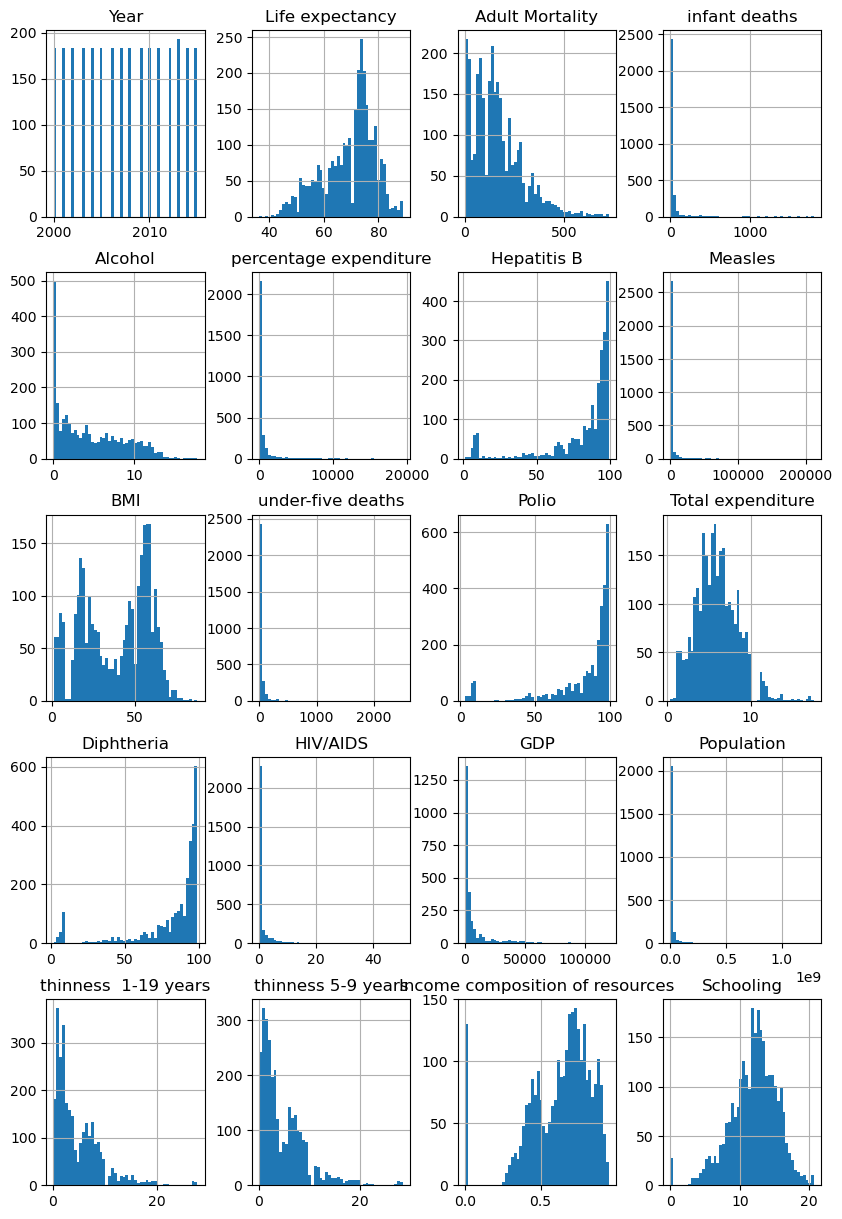

In [11]:
#Here we have a histogram of all the numerical data in the dataset. 
import matplotlib.pyplot as plt 

%matplotlib inline 
datacopy.hist(bins=50,figsize = (10,15))
plt.show()

# Things I notice from the histogram?
- life expectancy is the highet at around age 70-80 
- weight is often lower for the younger 
- Schooling increases after age 10 and decreases right before 20 years old 
- some are skewed right some left and some are bell shapped 

Next thing to do is bin the life expectancy results, we want to make sure that the test set is representative of the various categories of life expectancy so that it reflects well world situations the model will see inthe future. 

In [12]:
datacopy["life_expc_cat"] = pd.cut(datacopy['Life expectancy'],
                                   bins= [0,20,40,60,80, np.inf],
                                labels = [0,20,40,60,80])

 An important observation I see is that despite the country being developed or developing for most the life expectancy is 55-65. That is quite scary because most people dont think of 25-35 years as a mid life point. 


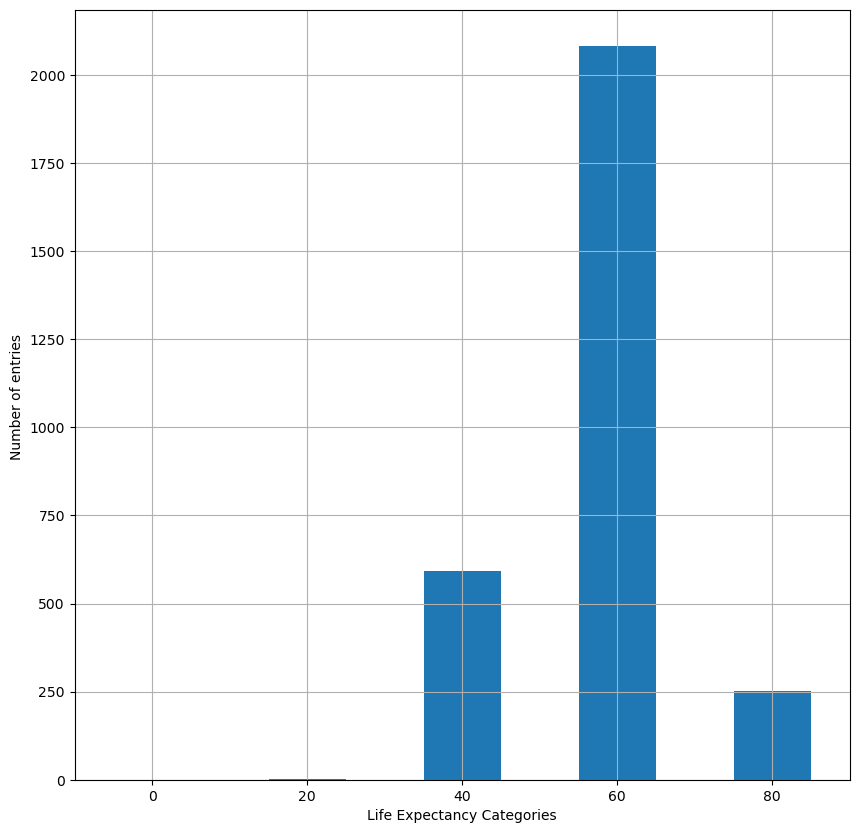

In [13]:
datacopy['life_expc_cat'].value_counts().sort_index().plot.bar(rot = 0,
                                                               grid = True, figsize = (10,10))
                                         
plt.xlabel("Life Expectancy Categories")
plt.ylabel("Number of entries ")
plt.show()

# Now it's time to split the data!
I choose the StratifiedShuffleSplit method to split the data because theres different countries in the data and I'd like for them all to be equally represented troughout any analysis done. 

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit


An issue I ran into when splitting the data was that the splitting method StratifiedShuffleSplit only worked if the values in the column country repeated more than once, meaning if there was country listed only once then StratifiedShuffleSplit would error out. Best way to deal with this was to turn all the countries listed once into "other" that way I could properly split the data and still represent them in the analysis in some way. 

In [15]:
country_counts = datacopy["Country"].value_counts()
rare_countries = country_counts[country_counts < 2].index
rare_countries

Index(['Tuvalu', 'Cook Islands', 'Marshall Islands', 'Monaco', 'Palau', 'Niue',
       'San Marino', 'Nauru', 'Saint Kitts and Nevis', 'Dominica'],
      dtype='object')

Now I am going to rename all these countries as "Other 

In [16]:
datacopy["Country"] = datacopy["Country"].apply(
    lambda x: 'Other'if x in rare_countries else x)


In [17]:
split = StratifiedShuffleSplit (n_splits= 1, test_size = 0.2 , random_state = 42)
for train_index, test_index in split.split(datacopy,datacopy["Country"]):
    strat_train_set = datacopy.loc[train_index]
    strat_test_set = datacopy.loc[test_index]

In [18]:
# Here Im just checking that the data did split. Training set looks great. 
strat_train_set.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,life_expc_cat
1879,Niger,2013,Developing,69.0,227.0,49,0.01,31.502432,67.0,1224,...,5.90,67.0,0.6,416.148380,18426372.0,1.0,9.9,0.341,5.3,60
679,Cyprus,2009,Developed,79.3,6.0,0,10.80,230.252418,96.0,0,...,7.40,99.0,0.1,3215.815900,19876.0,0.9,1.0,0.849,14.1,60
1004,Germany,2005,Developed,79.2,85.0,3,11.67,6012.925840,9.0,778,...,1.52,96.0,0.1,34696.629200,82469422.0,1.1,1.1,0.884,16.4,60
1099,Guinea-Bissau,2006,Developing,54.4,36.0,5,3.22,21.533749,NaN,0,...,5.87,71.0,5.6,418.944540,1412669.0,8.9,8.8,0.388,8.3,40
2454,Sri Lanka,2002,Developing,73.7,149.0,5,1.62,59.635957,NaN,139,...,3.89,98.0,0.1,873.147244,18939.0,15.4,15.6,0.699,12.6,60


In [19]:
#Confirming the training set gathered data from 2000 to 2015 
strat_train_set["Year"].value_counts().sort_index()

2000    134
2001    149
2002    143
2003    144
2004    151
2005    154
2006    157
2007    141
2008    144
2009    149
2010    152
2011    140
2012    147
2013    150
2014    144
2015    151
Name: Year, dtype: int64

# Data Exploration of Training Set 

First we will create a list of all the numerical colums first and then run a correlation matrix on those columns in the list. 

In [20]:
num_cols =['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'life_expc_cat']
corr_matrix = strat_train_set[num_cols].corr(numeric_only=True)
corr_matrix

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.175154,-0.078695,-0.030396,-0.053121,0.034136,0.102644,-0.072637,0.115901,-0.036967,0.102973,0.092281,0.133938,-0.147899,0.098437,-0.000615,-0.045210,-0.049534,0.231720,0.203696
Life expectancy,0.175154,1.000000,-0.681869,-0.202663,0.402261,0.386002,0.265363,-0.160464,0.577810,-0.229759,0.467077,0.224728,0.482968,-0.553082,0.464872,-0.026045,-0.481815,-0.474066,0.732705,0.761026
Adult Mortality,-0.078695,-0.681869,1.000000,0.085884,-0.183229,-0.242313,-0.168489,0.037788,-0.388735,0.101178,-0.254155,-0.120802,-0.269762,0.506141,-0.295777,-0.015462,0.302770,0.306954,-0.456098,-0.453306
infant deaths,-0.030396,-0.202663,0.085884,1.000000,-0.112933,-0.088065,-0.231598,0.506865,-0.232828,0.996415,-0.176337,-0.129724,-0.182816,0.028557,-0.110903,0.625299,0.459335,0.463810,-0.150908,-0.199376
Alcohol,-0.053121,0.402261,-0.183229,-0.112933,1.000000,0.332062,0.082162,-0.057446,0.324730,-0.108891,0.220413,0.301430,0.222643,-0.047483,0.341759,-0.040458,-0.429699,-0.420958,0.457067,0.551196
percentage expenditure,0.034136,0.386002,-0.242313,-0.088065,0.332062,1.000000,0.014892,-0.058939,0.240029,-0.090371,0.151391,0.187875,0.151355,-0.098392,0.898532,-0.028591,-0.254047,-0.256828,0.386670,0.399791
Hepatitis B,0.102644,0.265363,-0.168489,-0.231598,0.082162,0.014892,1.000000,-0.116283,0.159158,-0.241970,0.508837,0.064106,0.618852,-0.121451,0.082818,-0.147117,-0.124048,-0.130208,0.204907,0.227529
Measles,-0.072637,-0.160464,0.037788,0.506865,-0.057446,-0.058939,-0.116283,1.000000,-0.180034,0.510717,-0.124451,-0.103973,-0.131099,0.034771,-0.078580,0.256706,0.210698,0.208542,-0.127301,-0.143685
BMI,0.115901,0.577810,-0.388735,-0.232828,0.324730,0.240029,0.159158,-0.180034,1.000000,-0.243716,0.290114,0.244746,0.280268,-0.248938,0.318327,-0.073838,-0.542117,-0.554466,0.522272,0.564905
under-five deaths,-0.036967,-0.229759,0.101178,0.996415,-0.108891,-0.090371,-0.241970,0.510717,-0.243716,1.000000,-0.194938,-0.130800,-0.204434,0.041711,-0.114707,0.614032,0.463140,0.466043,-0.169946,-0.216243


This dataframe shows us all the correlation measurements the features had with each other. In the following DataFrame I wanted to make my life easier to find the strongest possitive and negative correlations in the correlation matrix.  
- Negative correlation: these two variables move in opposite directions. one goes up one decreases and vice versa 
- Possitive correlation:  as one variable increases, the other variable also increases.

In [21]:

mask = (corr_matrix < -0.6) | (corr_matrix > 0.6)
corr_matrix[mask]

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life expectancy,NaN,1.000000,-0.681869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.732705,0.761026
Adult Mortality,NaN,-0.681869,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
infant deaths,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.996415,NaN,NaN,NaN,NaN,NaN,0.625299,NaN,NaN,NaN,NaN
Alcohol,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percentage expenditure,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.898532,NaN,NaN,NaN,NaN,NaN
Hepatitis B,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.618852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Measles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
under-five deaths,NaN,NaN,NaN,0.996415,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.614032,NaN,NaN,NaN,NaN


Strongest possitive and Negative correlations are as followes. 

- Adult Mortality and Life expectancy : -0.681869 is a strong negative relationship meaning as adult mortality mortality increases life expectansy decreases and if life expectansy increases adult mortality decreases 
- Income composition of resources and Life Expectansy: 0.732705	 is a strong possitive correlation meaning as the population increases income composition of resources then life expectansy increases and if the population increases in life expectansy then the income composition of resources also increases. 
- Schooling and Life Expectansy: 0.761026  is a strong possitive correlation meaning is a population finds a way to imporove their schooling or education their life expectansy goes up. 
- under five deaths and infant deaths: 0.996415 is a strong possitive correlation wich makes sense because infant deaths is babies dying under 1 year. The higher infant death are under five deaths increase. 
- population and infant deaths: 0.625299 is a strong possitive correlation meaning the more population increases the more infant death count there is. 
- GDP and percentage expenditure: 0.898532 is also a positive correlation meaning the more value of goods and serv ice product the more its population percentage expediature increases. They spend more in general probably because there is more goods. 
- Diphtheria and Hepatitis B: 0.618852 is a possitive relationship meaning the more Diphteria cases the more Hepatitis B cases there is and vice versa. 
- Diphtheria and Polio: 0.679932 is a strong possitive correlation meaning the more Diphteria cases the more polio cases there is and vice versa. 
- thinness 1-19 years and thinness 5-9 years :0.936231 have a very strong possitive correlation because 5-9 falls in the same age range as 1-19. 
- Income composition of resources and Schooling: 0.802569 have a strong possitive correlation meaning that if a country finds ways to make income out of their reassoucess schooling in that country increases and vice versa if schooling increases income composition of resources increase. 




In [22]:
life = corr_matrix["Life expectancy"].sort_values(ascending = False)
life

Life expectancy                    1.000000
Schooling                          0.761026
Income composition of resources    0.732705
BMI                                0.577810
Diphtheria                         0.482968
Polio                              0.467077
GDP                                0.464872
Alcohol                            0.402261
percentage expenditure             0.386002
Hepatitis B                        0.265363
Total expenditure                  0.224728
Year                               0.175154
Population                        -0.026045
Measles                           -0.160464
infant deaths                     -0.202663
under-five deaths                 -0.229759
thinness 5-9 years                -0.474066
thinness  1-19 years              -0.481815
HIV/AIDS                          -0.553082
Adult Mortality                   -0.681869
Name: Life expectancy, dtype: float64

My main focus on this project is life expectancy and the avobe information confirms that the biggest factors that affect life expectancy are 
- BMI : 0.577810
- Income composition of resources : 0.732705
- Schooling : 0.761026

Altough correlation does not mean causation lets plot these main features with the highest possitive correlation to see the shape of the data. 


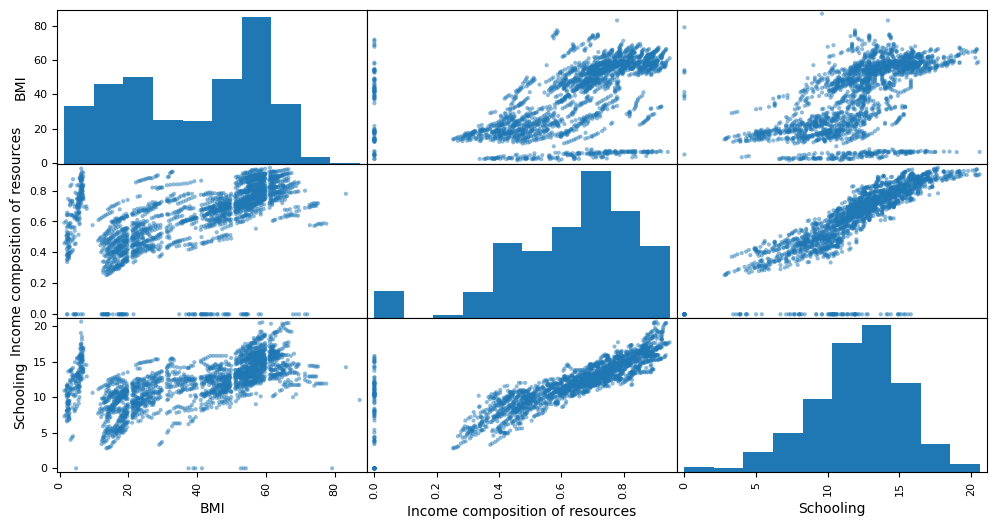

In [23]:

from pandas.plotting import scatter_matrix 
 # need to have only the attributes in question 
attributes = ["BMI","Income composition of resources","Schooling"]

scatter_matrix(strat_train_set[attributes], figsize= (12,6))
plt.show()

# Preparing Data for Machine Learning Algorithms 

1. First we are going to deal with Missing Values
I will also be making a copy of the training set to clean in order to maintain data integrity and have a backup incase of an issue.

In [24]:
# When preparing the data we need to make sure it is set up as a DataFrame
import pandas as pd

strat_train_set2 = pd.DataFrame(strat_train_set.copy())
strat_train_set2.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,life_expc_cat
1879,Niger,2013,Developing,69.0,227.0,49,0.01,31.502432,67.0,1224,...,5.90,67.0,0.6,416.148380,18426372.0,1.0,9.9,0.341,5.3,60
679,Cyprus,2009,Developed,79.3,6.0,0,10.80,230.252418,96.0,0,...,7.40,99.0,0.1,3215.815900,19876.0,0.9,1.0,0.849,14.1,60
1004,Germany,2005,Developed,79.2,85.0,3,11.67,6012.925840,9.0,778,...,1.52,96.0,0.1,34696.629200,82469422.0,1.1,1.1,0.884,16.4,60
1099,Guinea-Bissau,2006,Developing,54.4,36.0,5,3.22,21.533749,NaN,0,...,5.87,71.0,5.6,418.944540,1412669.0,8.9,8.8,0.388,8.3,40
2454,Sri Lanka,2002,Developing,73.7,149.0,5,1.62,59.635957,NaN,139,...,3.89,98.0,0.1,873.147244,18939.0,15.4,15.6,0.699,12.6,60


In [25]:
strat_train_set2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 1879 to 2363
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          2350 non-null   object  
 1   Year                             2350 non-null   int64   
 2   Status                           2350 non-null   object  
 3   Life expectancy                  2342 non-null   float64 
 4   Adult Mortality                  2342 non-null   float64 
 5   infant deaths                    2350 non-null   int64   
 6   Alcohol                          2189 non-null   float64 
 7   percentage expenditure           2350 non-null   float64 
 8   Hepatitis B                      1914 non-null   float64 
 9   Measles                          2350 non-null   int64   
 10  BMI                              2322 non-null   float64 
 11  under-five deaths                2350 non-null   int64   
 12  Pol

Lets see what columns have missing data first out of 2350 rows × 23 columns in the training set, this gives us an idea of what we migh be dealing with later on. I see that 15/23 columns have missing data.

In [26]:
 strat_train_set2.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      8
Adult Mortality                      8
infant deaths                        0
Alcohol                            161
percentage expenditure               0
Hepatitis B                        436
Measles                              0
BMI                                 28
under-five deaths                    0
Polio                               15
Total expenditure                  188
Diphtheria                          15
HIV/AIDS                             0
GDP                                357
Population                         520
thinness  1-19 years                28
thinness 5-9 years                  28
Income composition of resources    134
Schooling                          131
life_expc_cat                        8
dtype: int64

when creating my pipeline to clean and prepare the data later on I will need to know the shapes of each column in order to use the correct method to fill in the data/ 

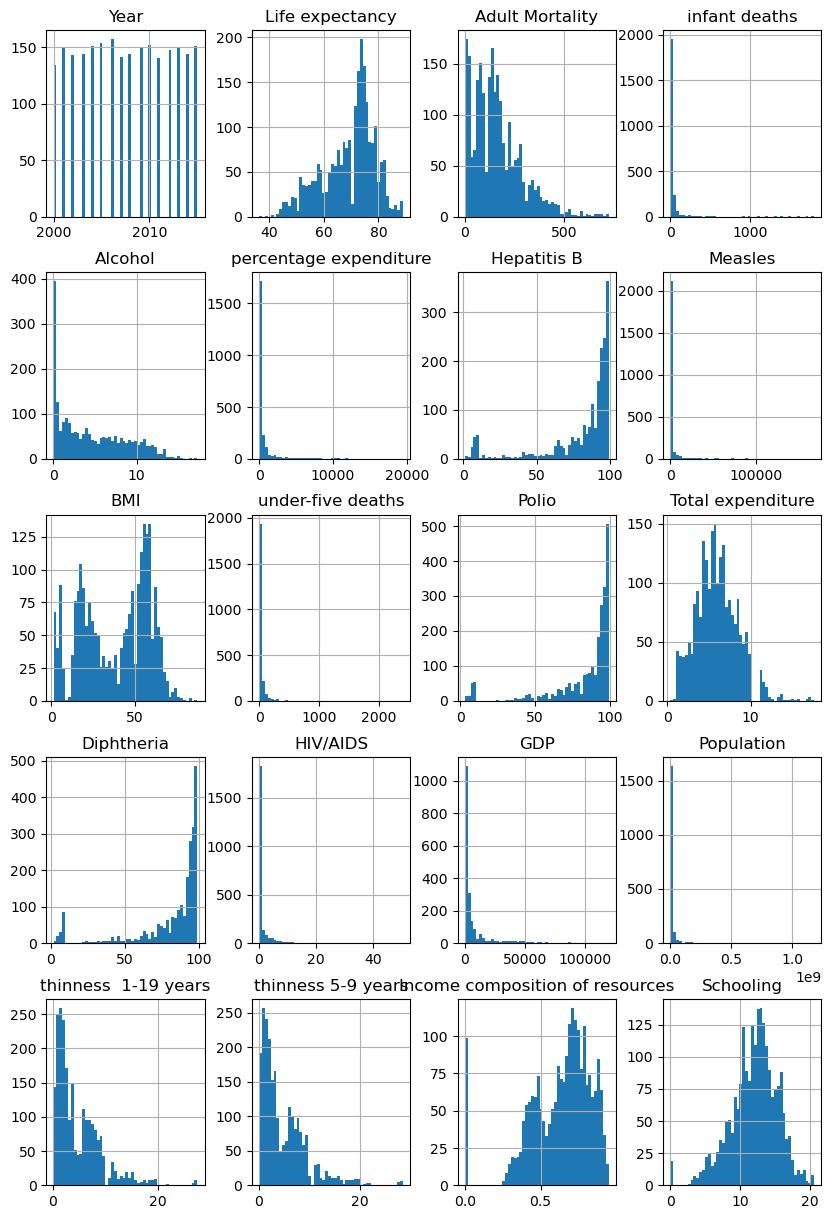

In [27]:
%matplotlib inline 
strat_train_set2.hist(bins=50,figsize = (10,15))
plt.show()

Im going to create a custom transformer to add features to the data. This is called feature engineering. 

In [28]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_GDP_per_Capita=True, column_names=None):
        self.add_GDP_per_Capita = add_GDP_per_Capita
        self.column_names = column_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Convert NumPy array back to DataFrame
        X_df = pd.DataFrame(X, columns=self.column_names)

        # Print the columns to verify
        print("Columns in CombinedAttributeAdder:", X_df.columns)

        # Update the required column names to match the new names
        Alcohol_ix = 'Alcohol'
        Total_expenditure_ix = 'Total expenditure'
        GDP_ix = 'GDP'
        Population_ix = 'Population'
        Schooling_ix = 'Schooling'
        Income_composition_of_resources_ix = 'Income composition of resources'

        # Check if the required columns exist in X_df
        required_columns = [Alcohol_ix, Population_ix, GDP_ix, Schooling_ix, Income_composition_of_resources_ix, Total_expenditure_ix]
        for col in required_columns:
            if col not in X_df.columns:
                raise ValueError(f"Column '{col}' is missing from the input DataFrame")

        Alchohol_per_capita = X_df[Alcohol_ix] / X_df[Population_ix]
        GDP_per_Capita = X_df[GDP_ix] / X_df[Population_ix]
        Social_devel_in = X_df[Schooling_ix] + X_df[Income_composition_of_resources_ix] + X_df[Total_expenditure_ix] / 3

        if self.add_GDP_per_Capita:
            return pd.DataFrame(np.c_[X_df, Alchohol_per_capita, GDP_per_Capita, Social_devel_in], columns=list(X_df.columns) + ['Alchohol_per_capita', 'GDP_per_Capita', 'Social_devel_in'])
        else:
             return pd.DataFrame(np.c_[X_df, Alchohol_per_capita, GDP_per_Capita, Social_devel_in], columns=list(X_df.columns) + ['Alchohol_per_capita', 'GDP_per_Capita', 'Social_devel_in'])



Now that the custom transformer is created I can actually add the new attributes or column names to the data set. 

In [29]:
# Assuming you have already created an instance of CombinedAttributeAdder
combined_attr_adder = CombinedAttributeAdder(add_GDP_per_Capita=True, column_names=strat_train_set2.columns)

# Fit and transform your training set
new_columns = combined_attr_adder.fit_transform(strat_train_set2)


Columns in CombinedAttributeAdder: Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'life_expc_cat'],
      dtype='object')


In [30]:
new_columns.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,life_expc_cat,Alchohol_per_capita,GDP_per_Capita,Social_devel_in
0,Niger,2013,Developing,69.0,227.0,49,0.01,31.502432,67.0,1224,...,416.14838,18426372.0,1.0,9.9,0.341,5.3,60,0.0,0.000023,7.607667
1,Cyprus,2009,Developed,79.3,6.0,0,10.8,230.252418,96.0,0,...,3215.8159,19876.0,0.9,1.0,0.849,14.1,60,0.000543,0.161794,17.415667
2,Germany,2005,Developed,79.2,85.0,3,11.67,6012.92584,9.0,778,...,34696.6292,82469422.0,1.1,1.1,0.884,16.4,60,0.0,0.000421,17.790667
3,Guinea-Bissau,2006,Developing,54.4,36.0,5,3.22,21.533749,NaN,0,...,418.94454,1412669.0,8.9,8.8,0.388,8.3,40,0.000002,0.000297,10.644667
4,Sri Lanka,2002,Developing,73.7,149.0,5,1.62,59.635957,NaN,139,...,873.147244,18939.0,15.4,15.6,0.699,12.6,60,0.000086,0.046103,14.595667


In [31]:
# new columns were added sucessfully 
new_columns.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      8
Adult Mortality                      8
infant deaths                        0
Alcohol                            161
percentage expenditure               0
Hepatitis B                        436
Measles                              0
BMI                                 28
under-five deaths                    0
Polio                               15
Total expenditure                  188
Diphtheria                          15
HIV/AIDS                             0
GDP                                357
Population                         520
thinness  1-19 years                28
thinness 5-9 years                  28
Income composition of resources    134
Schooling                          131
life_expc_cat                        8
Alchohol_per_capita                650
GDP_per_Capita                     539
Social_devel_in          

In [32]:
new_columns.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,life_expc_cat,Alchohol_per_capita,GDP_per_Capita,Social_devel_in
0,Niger,2013,Developing,69.0,227.0,49,0.01,31.502432,67.0,1224,...,416.14838,18426372.0,1.0,9.9,0.341,5.3,60,0.0,0.000023,7.607667
1,Cyprus,2009,Developed,79.3,6.0,0,10.8,230.252418,96.0,0,...,3215.8159,19876.0,0.9,1.0,0.849,14.1,60,0.000543,0.161794,17.415667
2,Germany,2005,Developed,79.2,85.0,3,11.67,6012.92584,9.0,778,...,34696.6292,82469422.0,1.1,1.1,0.884,16.4,60,0.0,0.000421,17.790667
3,Guinea-Bissau,2006,Developing,54.4,36.0,5,3.22,21.533749,NaN,0,...,418.94454,1412669.0,8.9,8.8,0.388,8.3,40,0.000002,0.000297,10.644667
4,Sri Lanka,2002,Developing,73.7,149.0,5,1.62,59.635957,NaN,139,...,873.147244,18939.0,15.4,15.6,0.699,12.6,60,0.000086,0.046103,14.595667


Next I will create the column transformers so that the columns use the correct methods to fill in missing data and how to deal with the categorical data. 

In [33]:
# Columns with skewed distributions - will use median 
skewed_columns = ["Adult Mortality", "infant deaths", "Alcohol", "Measles", "under-five deaths",
                  "Total expenditure", "HIV/AIDS", "thinness 5-9 years", 
                  "Hepatitis B", "Polio", "Diphtheria", "GDP", "Population", "thinness  1-19 years", "BMI", 
                  "Income composition of resources","life_expc_cat", "Life expectancy", 
                  'Alchohol_per_capita', 'GDP_per_Capita', 'Social_devel_in' ]

# Columns with normal distributions - use mean
normal_columns = ["Schooling"]

# Categorical columns - use most frequent 
categorical_columns = ['Country', 'Status']

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('median_imputer', SimpleImputer(strategy='median'), skewed_columns),
        ('mean_imputer', SimpleImputer(strategy='mean'), normal_columns),
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ],
    remainder='passthrough'  # Keep the remaining columns as they are
)

Here SimpleImputer(strategy='median')
SimpleImputer(strategy='mean')
"Strategy" is the hyperparameter because I am specifying what will happen to the missing values and how they will be dealt with. 



In [34]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('median_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['Adult Mortality', 'infant deaths', 'Alcohol',
                                  'Measles', 'under-five deaths',
                                  'Total expenditure', 'HIV/AIDS',
                                  'thinness 5-9 years', 'Hepatitis B', 'Polio',
                                  'Diphtheria', 'GDP', 'Population',
                                  'thinness  1-19 years', 'BMI',
                                  'Income composition of resources',
                                  'life_expc_cat', 'Life expectancy',
                                  'Alchohol_per_capita', 'GDP_per_Capita',
                                  'Social_devel_in']),
                                ('mean_imputer', SimpleImputer(),
                                 ['Schooling']),
                                ('onehot',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Country', 'Status'])])

# Now I can Create a Pipeline 

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [36]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # missing data is being filled and cat data is turning into numerical
      # fixed the missing parenthesis
    ('scaler', StandardScaler())  # all columns are being standardized
])

# Apply the pipeline to the data 
                           
strat_train_set2_transform = pipeline.fit_transform(new_columns)

StandardScaler:

When you fit the StandardScaler to the data, it calculates the mean and standard deviation for each feature. These values are the parameters that are learned from the data.



In [37]:
strat_train_set2_transform

array([[ 0.51625014,  0.1693492 , -1.15960083, ...,  0.46107516,
         1.19096154, -0.35784012],
       [-1.27374558, -0.26228922,  1.58608302, ..., -2.16884382,
         0.31853024, -0.25690487],
       [-0.63388286, -0.23586238,  1.80746809, ..., -2.16884382,
        -0.55390107,  2.67982763],
       ...,
       [-0.62578333, -0.26228922, -0.20535482, ..., -2.16884382,
         1.6271772 , -0.37383864],
       [ 0.24896571, -0.00682975, -1.11125237, ...,  0.46107516,
        -0.11768541, -0.34731409],
       [ 0.15177137, -0.26228922, -1.15960083, ...,  0.46107516,
         1.19096154, -0.36127783]])

In [38]:
preprocessed_data = preprocessor.fit_transform(new_columns)
print(preprocessed_data)


[[227.0 49.0 0.01 ... 1.0 2013 31.50243237]
 [6.0 0.0 10.8 ... 0.0 2009 230.2524184]
 [85.0 3.0 11.67 ... 0.0 2005 6012.92584]
 ...
 [86.0 0.0 3.76 ... 0.0 2015 0.0]
 [194.0 29.0 0.2 ... 1.0 2007 52.22906505]
 [182.0 0.0 0.01 ... 1.0 2013 24.73328608]]


In [39]:
preprocessed_df = pd.DataFrame(preprocessed_data, 
                               columns=preprocessor.get_feature_names_out())
preprocessed_df.columns


Index(['median_imputer__Adult Mortality', 'median_imputer__infant deaths',
       'median_imputer__Alcohol', 'median_imputer__Measles',
       'median_imputer__under-five deaths',
       'median_imputer__Total expenditure', 'median_imputer__HIV/AIDS',
       'median_imputer__thinness 5-9 years', 'median_imputer__Hepatitis B',
       'median_imputer__Polio',
       ...
       'onehot__Country_Uzbekistan', 'onehot__Country_Vanuatu',
       'onehot__Country_Venezuela (Bolivarian Republic of)',
       'onehot__Country_Viet Nam', 'onehot__Country_Yemen',
       'onehot__Country_Zambia', 'onehot__Country_Zimbabwe',
       'onehot__Status_Developing', 'remainder__Year',
       'remainder__percentage expenditure'],
      dtype='object', length=208)

# Now I can select a model and train it ! 

In [40]:
y = new_columns [["Life expectancy"]].fillna( new_columns [["Life expectancy"]].median())
y.head()

,Life expectancy
0,69.0
1,79.3
2,79.2
3,54.4
4,73.7


In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(strat_train_set2_transform, y)


LinearRegression()

# Now I can make some predictions

In [42]:
life_expc_pred = lin_reg.predict(strat_train_set2_transform)

life_expc_pred[:5]

array([[69. ],
       [79.3],
       [79.2],
       [54.4],
       [73.7]])

In [43]:
y[:5]

,Life expectancy
0,69.0
1,79.3
2,79.2
3,54.4
4,73.7


The fact that the predictions are the same means that the model is working extremely well. 

Evaluating the model using 
# RMSE 
(RMSE) is a metric used to evaluate the accuracy of a regression model. It measures the average magnitude of the errors between the predicted values and the actual values. In other words, it tells you how well your model's predictions match the actual data.


In [44]:
from sklearn.metrics import mean_squared_error 

lin_rmse = mean_squared_error (y,life_expc_pred,
                              squared = False)

lin_rmse

1.9559774614844378e-14

An RMSE of years indicates that on average the predictions made by the model I created are only 1.95 years away from the actual values. 

# Decision Tree 

In [45]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.pipeline import make_pipeline

tree_reg = make_pipeline(preprocessor, DecisionTreeRegressor (random_state = 42))

tree_reg.fit(new_columns, y)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('median_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Adult Mortality',
                                                   'infant deaths', 'Alcohol',
                                                   'Measles',
                                                   'under-five deaths',
                                                   'Total expenditure',
                                                   'HIV/AIDS',
                                                   'thinness 5-9 years',
                                                   'Hepatitis B', 'Polio',
                                                   'Diphtheria', 'GDP',
                                                   'Population',
                                                   'thinness  1-19 years',
                                                   'BMI',
                                                   'Income composition of '
                                                   'resources',
                                                   'life_expc_cat',
                                                   'Life expectancy',
                                                   'Alchohol_per_capita',
                                                   'GDP_per_Capita',
                                                   'Social_devel_in']),
                                                 ('mean_imputer',
                                                  SimpleImputer(),
                                                  ['Schooling']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Country', 'Status'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

Keep in mind that yes you are fitting the original training data because then the pipeline will do the transformations internally. 

In [46]:
strat_train_set2_transform = tree_reg.predict(new_columns)

tree_rmse = mean_squared_error(y, life_expc_pred,
                              squared=False)
tree_rmse

1.9559774614844378e-14

Awesome the new decision tree method also gave me a low number which is good aswell. 

As you can see this is a very low and close to 0 for both evaluation methods meaning the model predictions are almost identical to actual values. Now we can confirm with more confidence the accurasy of the model. To be even more confident lets double check that the model is not over fitting the data. 

# Ussing Cross- Validation

In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, new_columns, y, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([0.03632009, 0.04472136, 0.03967957, 0.0611938 , 0.33700811,
       0.04612656, 0.07935914, 0.07551243, 0.23843461, 0.03632009])

In this line, cross_val_score is performing 10-fold cross-validation on the pipeline tree_reg. The tree_reg pipeline includes both the preprocessing steps and the decision tree regressor. The new_columns DataFrame is passed to the pipeline, which means the preprocessing steps are applied to the original DataFrame before the decision tree regressor is trained and evaluated.

In [48]:
pd.Series (tree_rmse_scores).describe()

count    10.000000
mean      0.099468
std       0.103049
min       0.036320
25%       0.040940
50%       0.053660
75%       0.078397
max       0.337008
dtype: float64

The mean is even lower than before meaning tha during each fold the predictions were almost identical and this is on unseen data. All 10 fold are considered a validation set. 

After running a few model evaluation methods we need to fine tun them. We have to do this to adjust its hyperparameters in order to reduce overfittiong or underfitting the data and to improve eprformance. 

Underfitting: The model is too simple (e.g., a straight line for curved data).

Overfitting: The model is too complex (e.g., a very wiggly curve for a few data points).

How to Address Them
Underfitting: Increase model complexity, add more features, or reduce regularization.

Overfitting: Simplify the model, use regularization techniques, or gather more training data.

# GridSearch

In [49]:
# Assuming y is your target variable
y = y.values.ravel()


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

strat_train_set2_transform = preprocessor.fit_transform(new_columns)

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)

grid_search.fit(strat_train_set2_transform, y)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Now that the grid search is created we can find what were the best combinations of hyperparameters. 

In [51]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [52]:
grid_search.best_estimator_


RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [53]:
#valadidation score / generalization scores 
# Validation score / generalization scores
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres['params']):
    print(np.sqrt(-mean_score), params)





2.978267372686656 {'max_features': 2, 'n_estimators': 3}
2.2017959361556656 {'max_features': 2, 'n_estimators': 10}
1.9497331630734387 {'max_features': 2, 'n_estimators': 30}
2.7228131248893868 {'max_features': 4, 'n_estimators': 3}
2.1983105244817893 {'max_features': 4, 'n_estimators': 10}
1.8814560747542912 {'max_features': 4, 'n_estimators': 30}
2.866192847568642 {'max_features': 6, 'n_estimators': 3}
2.10279283194516 {'max_features': 6, 'n_estimators': 10}
1.8423409862772102 {'max_features': 6, 'n_estimators': 30}
2.2915963496626617 {'max_features': 8, 'n_estimators': 3}
1.7941058279009348 {'max_features': 8, 'n_estimators': 10}
1.6901848723009216 {'max_features': 8, 'n_estimators': 30}
2.580698498431537 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1.9933027921263962 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
2.444195749038651 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1.949249404480169 {'bootstrap': False, 'max_features': 3, 'n_estima

1.6901848723009216 {'max_features': 8, 'n_estimators': 30} 
this is the lowest score which confirms why it picked {'max_features': 8, 'n_estimators': 30} combination

# Analyze the best model and their errors 

In [54]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([5.03775474e-02, 2.91694006e-02, 2.53231991e-02, 1.33969176e-02,
       3.91069234e-02, 1.04025435e-02, 1.08795765e-01, 3.82969650e-02,
       1.35584424e-02, 2.39018932e-02, 3.87579588e-02, 3.67084356e-02,
       5.55462680e-03, 2.77503962e-02, 1.96656344e-02, 8.68058518e-02,
       7.49770195e-02, 1.35850589e-01, 5.21274101e-03, 5.39378743e-03,
       4.36673587e-02, 5.47817475e-02, 5.26670754e-05, 3.59920701e-05,
       3.46460908e-04, 1.88636651e-05, 2.80595453e-05, 3.90081103e-05,
       1.95457110e-04, 2.95871592e-04, 4.08729793e-05, 1.54822950e-05,
       3.11313832e-05, 3.97767708e-04, 2.75256250e-05, 1.66287517e-04,
       6.11371126e-05, 1.77313076e-04, 7.13163727e-05, 4.03956790e-05,
       1.01706767e-04, 2.04168808e-04, 2.58915087e-03, 2.93772547e-04,
       2.42426926e-05, 1.18145853e-04, 1.18787551e-04, 1.37739898e-03,
       2.56300009e-04, 1.35161348e-04, 2.38024914e-04, 5.02887923e-05,
       6.99882310e-04, 3.86829912e-04, 1.29135765e-04, 6.65901786e-04,
      

In [55]:
extra_attribs = ['Alchohol_per_capita', 'GDP_per_Capita', 'Social_devel_in']
cat_encoder = preprocessor.named_transformers_["onehot"]
cat_one_hot_attribs = list(cat_encoder.get_feature_names_out())
all_attribs = num_cols + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, all_attribs), reverse=True)



[(0.13585058876030148, 'Population'),
 (0.10879576468946807, 'Alcohol'),
 (0.08680585184692825, 'HIV/AIDS'),
 (0.0749770194527839, 'GDP'),
 (0.05478174749460274, 'Schooling'),
 (0.05037754744595414, 'Country'),
 (0.0436673586902034, 'Income composition of resources'),
 (0.03910692339258036, 'Adult Mortality'),
 (0.038757958766597975, 'BMI'),
 (0.03829696495494713, 'percentage expenditure'),
 (0.036708435643032715, 'under-five deaths'),
 (0.03630053150387911, 'Country_Zambia'),
 (0.02916940058886068, 'Year'),
 (0.027750396230790866, 'Total expenditure'),
 (0.025323199053214323, 'Status'),
 (0.023901893222502683, 'Measles'),
 (0.022395098353578616, 'Country_Viet Nam'),
 (0.019665634374193046, 'Diphtheria'),
 (0.013558442430464246, 'Hepatitis B'),
 (0.013396917570681679, 'Life expectancy'),
 (0.010402543508468773, 'infant deaths'),
 (0.0077010116251803535, 'Country_Yemen'),
 (0.005554626801991502, 'Polio'),
 (0.005393787431967865, 'thinness 5-9 years'),
 (0.005212741009022553, 'thinness  

Now we need to pass the test set but first it needs to go trough all the transformation the train set went trough

In [56]:
strat_test_set_cat= strat_test_set [["Country", "Status"]]
strat_test_set_cat.head()


,Country,Status
543,Chad,Developing
1471,Lebanon,Developing
2391,Somalia,Developing
817,Egypt,Developing
2336,Slovakia,Developed


In [57]:
combined_attr_adder2 = CombinedAttributeAdder(
    add_GDP_per_Capita=True, 
    column_names= strat_test_set.columns)
new_columns2 = combined_attr_adder.fit_transform(strat_test_set)


Columns in CombinedAttributeAdder: Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'life_expc_cat'],
      dtype='object')


In [58]:
new_columns2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Country                          588 non-null    object
 1   Year                             588 non-null    object
 2   Status                           588 non-null    object
 3   Life expectancy                  586 non-null    object
 4   Adult Mortality                  586 non-null    object
 5   infant deaths                    588 non-null    object
 6   Alcohol                          555 non-null    object
 7   percentage expenditure           588 non-null    object
 8   Hepatitis B                      471 non-null    object
 9   Measles                          588 non-null    object
 10  BMI                              582 non-null    object
 11  under-five deaths                588 non-null    object
 12  Polio                            584

In [59]:
new_columns2.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,life_expc_cat,Alchohol_per_capita,GDP_per_Capita,Social_devel_in
0,Chad,2000,Developing,47.6,44.0,41,0.25,21.527016,NaN,3546,...,166.231785,8342559.0,11.5,11.4,0.0,4.7,40,0.0,0.00002,6.793333
1,Lebanon,2002,Developing,73.2,17.0,1,1.98,70.132078,77.0,36,...,5436.595223,3522837.0,4.8,4.7,0.0,15.2,60,0.000001,0.001543,15.7
2,Somalia,2001,Developing,57.0,352.0,46,0.01,0.0,NaN,3571,...,NaN,NaN,7.9,7.7,NaN,NaN,40,NaN,NaN,NaN
3,Egypt,2000,Developing,68.8,171.0,65,0.14,0.0,98.0,2633,...,NaN,NaN,3.6,3.5,0.606,11.0,60,NaN,NaN,13.456
4,Slovakia,2008,Developed,74.7,136.0,0,11.37,0.0,99.0,0,...,NaN,NaN,1.3,1.4,0.813,14.8,60,NaN,NaN,18.346333


In [60]:
print(new_columns2.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'life_expc_cat', 'Alchohol_per_capita', 'GDP_per_Capita',
       'Social_devel_in'],
      dtype='object')


In [61]:
# Columns with skewed distributions - will use median 
skewed_columns = ["Adult Mortality", "infant deaths", "Alcohol", "Measles", "under-five deaths",
                  "Total expenditure", "HIV/AIDS", "thinness 5-9 years", 
                  "Hepatitis B", "Polio", "Diphtheria", "GDP", "Population", "thinness  1-19 years", "BMI", 
                  "Income composition of resources","life_expc_cat", "Life expectancy", 
                  'Alchohol_per_capita', 'GDP_per_Capita', 'Social_devel_in' ]

# Columns with normal distributions - use mean
normal_columns = ["Schooling"]

# Categorical columns - use most frequent 
categorical_columns = ['Country', 'Status']

preprocessor = ColumnTransformer(
    transformers=[
        ('median_imputer', SimpleImputer(strategy='median'), skewed_columns),
        ('mean_imputer', SimpleImputer(strategy='mean'), normal_columns),
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
        ],
    remainder='passthrough'  # Keep the remaining columns as they are
)

In [62]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # missing data is being filled and cat data is turning into numerical
      # fixed the missing parenthesis
    ('scaler', StandardScaler())  # all columns are being standardized
])

# Apply the pipeline to the data 
                           
strat_test_set_transform = pipeline.fit_transform(new_columns2)

In [63]:
strat_test_set_transform

array([[-1.00242848,  0.06406082, -1.08432592, ...,  0.45267873,
        -1.57427927, -0.35209332],
       [-1.21625618, -0.23447505, -0.63918657, ...,  0.45267873,
        -1.15082263, -0.32849639],
       [ 1.43679126,  0.10137781, -1.14607935, ...,  0.45267873,
        -1.36255095, -0.36254433],
       ...,
       [ 2.75143566, -0.21208486, -1.14607935, ...,  0.45267873,
         1.17818888, -0.28809826],
       [ 0.81114723, -0.18969467, -1.14607935, ...,  0.45267873,
         0.96646056, -0.36254433],
       [-0.74108351, -0.23447505, -0.65719799, ...,  0.45267873,
         1.3899172 ,  1.5127227 ]])

In [64]:
preprocessed_data2 = preprocessor.fit_transform(new_columns2)
print(preprocessed_data2)



[[44.0 41.0 0.25 ... 1.0 2000 21.52701616]
 [17.0 1.0 1.98 ... 1.0 2002 70.13207838]
 [352.0 46.0 0.01 ... 1.0 2001 0.0]
 ...
 [518.0 4.0 0.01 ... 1.0 2013 153.3443147]
 [273.0 7.0 0.01 ... 1.0 2012 0.0]
 [77.0 1.0 1.91 ... 1.0 2014 3862.68271]]


In [65]:
preprocessed_df2 = pd.DataFrame(preprocessed_data2, columns=preprocessor.get_feature_names_out())
preprocessed_df2 = preprocessed_df2.apply(pd.to_numeric, errors='coerce')

In [66]:
preprocessed_df2.head()

,median_imputer__Adult Mortality,median_imputer__infant deaths,median_imputer__Alcohol,median_imputer__Measles,median_imputer__under-five deaths,median_imputer__Total expenditure,median_imputer__HIV/AIDS,median_imputer__thinness 5-9 years,median_imputer__Hepatitis B,median_imputer__Polio,...,onehot__Country_Uzbekistan,onehot__Country_Vanuatu,onehot__Country_Venezuela (Bolivarian Republic of),onehot__Country_Viet Nam,onehot__Country_Yemen,onehot__Country_Zambia,onehot__Country_Zimbabwe,onehot__Status_Developing,remainder__Year,remainder__percentage expenditure
0,44.0,41.0,0.25,3546.0,74.0,6.28,4.6,11.4,92.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2000,21.527016
1,17.0,1.0,1.98,36.0,1.0,1.50,0.1,4.7,77.0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2002,70.132078
2,352.0,46.0,0.01,3571.0,75.0,5.75,0.8,7.7,92.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2001,0.000000
3,171.0,65.0,0.14,2633.0,82.0,5.55,0.1,3.5,98.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2000,0.000000
4,136.0,0.0,11.37,0.0,0.0,8.20,0.1,1.4,99.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008,0.000000


In [67]:
# Convert columns to a list and print them
columns_list = preprocessed_df2.columns.tolist()
print(columns_list)


['median_imputer__Adult Mortality', 'median_imputer__infant deaths', 'median_imputer__Alcohol', 'median_imputer__Measles', 'median_imputer__under-five deaths', 'median_imputer__Total expenditure', 'median_imputer__HIV/AIDS', 'median_imputer__thinness 5-9 years', 'median_imputer__Hepatitis B', 'median_imputer__Polio', 'median_imputer__Diphtheria', 'median_imputer__GDP', 'median_imputer__Population', 'median_imputer__thinness  1-19 years', 'median_imputer__BMI', 'median_imputer__Income composition of resources', 'median_imputer__life_expc_cat', 'median_imputer__Life expectancy', 'median_imputer__Alchohol_per_capita', 'median_imputer__GDP_per_Capita', 'median_imputer__Social_devel_in', 'mean_imputer__Schooling', 'onehot__Country_Albania', 'onehot__Country_Algeria', 'onehot__Country_Angola', 'onehot__Country_Antigua and Barbuda', 'onehot__Country_Argentina', 'onehot__Country_Armenia', 'onehot__Country_Australia', 'onehot__Country_Austria', 'onehot__Country_Azerbaijan', 'onehot__Country_Bah

In [68]:
for column in columns_list:
    if 'expectancy' in column:
        print(column)


median_imputer__Life expectancy


In [69]:
y_test2 = new_columns2 [["Life expectancy"]].fillna( new_columns [["Life expectancy"]].median())
y_test2.head()

,Life expectancy
0,47.6
1,73.2
2,57.0
3,68.8
4,74.7


In [70]:
# Final model predictions
final_model = grid_search.best_estimator_

# Use the transformed test set features
X_test_prepared = preprocessed_df2

# Make predictions using the final model
final_predictions = final_model.predict(X_test_prepared)

# Calculate the RMSE
final_rmse = mean_squared_error(y_test2, final_predictions, squared=False)
final_rmse


C:\Users\angel\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


1.5545876310805855

In [71]:
datacopy['Country'].value_counts()

Afghanistan                                             16
Peru                                                    16
Nicaragua                                               16
Niger                                                   16
Nigeria                                                 16
Norway                                                  16
Oman                                                    16
Pakistan                                                16
Panama                                                  16
Papua New Guinea                                        16
Paraguay                                                16
Philippines                                             16
Albania                                                 16
Poland                                                  16
Portugal                                                16
Qatar                                                   16
Republic of Korea                                       

This final rmse is slighlty worse than the best estimator our grid search found but it is still great because it is low number on brand new data. 

In [72]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline

def predict_life_expectancy(year, country, model, pipeline, combined_attr_adder):
    # Create a DataFrame with the input data
    input_data = pd.DataFrame({
        'Country': [country],
        'Year': [year],
        'Status': ['Developed' if country in developed_countries1 else 'Developing'],
        'Life expectancy': [np.nan],  # Placeholder
        'Adult Mortality': [np.nan],  # Placeholder
        'infant deaths': [np.nan],  # Placeholder
        'Alcohol': [np.nan],  # Placeholder
        'percentage expenditure': [np.nan],  # Placeholder
        'Hepatitis B': [np.nan],  # Placeholder
        'Measles': [np.nan],  # Placeholder
        'BMI': [np.nan],  # Placeholder
        'under-five deaths': [np.nan],  # Placeholder
        'Polio': [np.nan],  # Placeholder
        'Total expenditure': [np.nan],  # Placeholder
        'Diphtheria': [np.nan],  # Placeholder
        'HIV/AIDS': [np.nan],  # Placeholder
        'GDP': [np.nan],  # Placeholder
        'Population': [np.nan],  # Placeholder
        'thinness  1-19 years': [np.nan],  # Placeholder
        'thinness 5-9 years': [np.nan],  # Placeholder
        'Income composition of resources': [np.nan],  # Placeholder
        'Schooling': [np.nan],  # Placeholder,
    })

    # Apply the CombinedAttributeAdder
    input_data = combined_attr_adder.transform(input_data)

    # Check for missing values and fill them if necessary
    input_data = input_data.fillna(0)

    # Preprocess the input data using the pipeline
    input_data_preprocessed = pipeline.transform(input_data)

    # Make predictions
    life_expectancy_prediction = model.predict(input_data_preprocessed)

    return life_expectancy_prediction[0]

# Example usage
year = 2030
country = 'Argentina'
predicted_life_expectancy = predict_life_expectancy(year, country, final_model, pipeline, combined_attr_adder)
print(f"Predicted life expectancy for {country} in {year}: {predicted_life_expectancy:.2f} years")



Columns in CombinedAttributeAdder: Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'life_expc_cat'],
      dtype='object')
Predicted life expectancy for Argentina in 2030: 59.83 years
